In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls "/content/drive/MyDrive"

'20231421 (1).jpg'	 'Exchange Rate.gsheet'
 20231421.docx		  IMG_20231016_210131_375.jpg
 20231421.jpg		  IMG_20240105_210703.jpg
 advertising.csv	 'InnovateX university application form (1).gdoc'
 AllFeat.ipynb		 'InnovateX university application form.gdoc'
'CM1607 Coursework'	 'InnovateX university application form.pdf'
 CM2607			 'Lecture 1.mp4'
'Colab Notebooks'	 'Lesson 5-SciKit Learn.ipynb'
 College_Data.csv	  MortalityDATA.xlsx
'Copy of Final.docx'	 'photo_2023-09-21_07-43-40 (1).jpg'
 CV			  photo_2023-09-21_07-43-40.jpg
'Deferral Request.docx'   Screenshot_2024-01-05-21-05-36-062_lk.nsbpay.user.jpg
 Diabetes_data.csv	  Social_Network_Ads.csv
'Dilakshan Rahul.jpg'	  vehicles.csv
 DSGP


In [8]:
!cd "/content/drive/MyDrive"

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
dataset = '/content/drive/MyDrive/MortalityDATA.xlsx'

In [11]:
df = pd.read_excel(dataset)
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [12]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [13]:
DM_df = df[df['diabetes_mellitus'] == 1]

X = DM_df.drop(columns=['diabetes_mellitus', #This is a dataset of diabetes
                        'encounter_id', 'icu_id', 'patient_id','hospital_id', #id
                        #'icu_type', #floorType
                        'ethnicity',
                        'Unnamed: 83', #null
                        #'apache_4a_hospital_death_prob','apache_4a_icu_death_prob' #death probablities
                        ])

y = DM_df['hospital_death'] #target variable
X = X.drop(columns=['hospital_death'])

In [14]:
X = X.drop(columns=['aids', 'lymphoma', 'cirrhosis','leukemia','hepatic_failure','immunosuppression','solid_tumor_with_metastasis',
                   'weight','height'])

In [15]:
X = X.drop(columns=[ #noninvasive
                            'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min',
                            'd1_mbp_noninvasive_max','d1_mbp_noninvasive_min',
                             'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
                             'h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min',
                             'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
                             'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min'
    ])

In [16]:
X.shape

(20492, 56)

Encode

In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender','icu_stay_type', 'icu_type','icu_admit_source','apache_3j_bodysystem','apache_2_bodysystem']
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])


In [18]:
X.columns

Index(['age', 'bmi', 'elective_surgery', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max',
       'h1_diasbp_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max',
       'h1_mbp_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max',
       'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_glucose_max',
       'd1_glucose_min', 'd1_potassium_max', 'd1_potassium_min',
    

In [19]:
# prompt: I want to take means of 'bmi' and 'age' and fill

# Fill missing values in 'bmi' and 'age' with their respective means
X['bmi'] = X['bmi'].fillna(X['bmi'].mean())
X['age'] = X['age'].fillna(X['age'].mean())

In [20]:
X.dtypes

,0
age,float64
bmi,float64
elective_surgery,int64
gender,int64
icu_admit_source,int64
icu_stay_type,int64
icu_type,int64
pre_icu_los_days,float64
apache_2_diagnosis,float64
apache_3j_diagnosis,float64


##Correlation

In [21]:
correlation = X.corr()

target_corr = correlation['hospital_death'].sort_values()

# Display less important features (absolute correlation < 0.1)
print("Features with low correlation with target:")
print(target_corr[abs(target_corr) < 0.1])

KeyError: 'hospital_death'

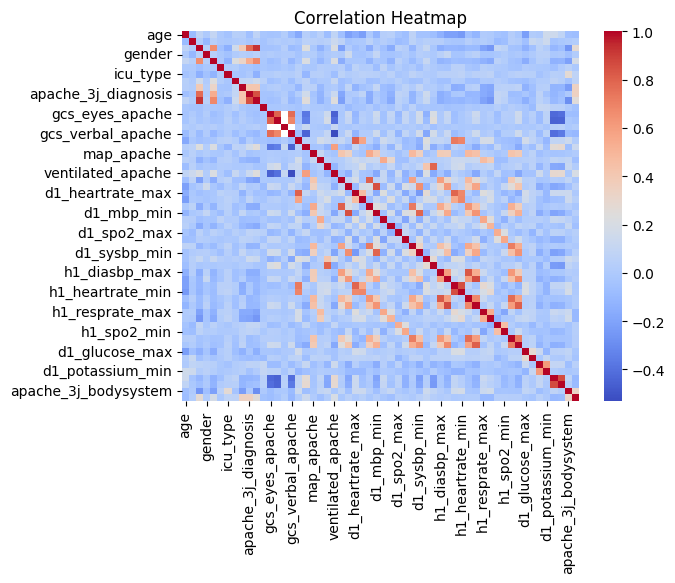

In [22]:
# Plot heatmap (optional)plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X.shape

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_
feature_importance = sorted(zip(importances, X.columns), reverse=True)

In [25]:
#Feature importance
print("Features IMportances :")
for importance, feature in feature_importance:
    print(f"{feature}: {importance*100}")

Features IMportances :
apache_4a_icu_death_prob: 7.698844812525745
apache_4a_hospital_death_prob: 6.371806235483525
d1_spo2_min: 2.7813127332715974
d1_temp_min: 2.7249570286734066
d1_heartrate_min: 2.676191291777873
d1_sysbp_min: 2.617339629255946
temp_apache: 2.5794425807389074
apache_3j_diagnosis: 2.4773539170575463
d1_glucose_min: 2.422757887226873
pre_icu_los_days: 2.406531705634405
d1_temp_max: 2.4012765288983045
d1_potassium_min: 2.327900917076105
bmi: 2.286296314974029
d1_glucose_max: 2.2182294888843472
d1_potassium_max: 2.1584933898009186
d1_diasbp_min: 2.128914889886324
d1_sysbp_max: 2.0954658448182895
d1_mbp_min: 2.0920782120606076
d1_heartrate_max: 2.076533795014759
h1_mbp_min: 1.9135243155415123
map_apache: 1.888880321760281
h1_sysbp_min: 1.8676493425683987
h1_sysbp_max: 1.847302351199532
d1_mbp_max: 1.8446786330570821
heart_rate_apache: 1.8342304798423847
h1_diasbp_min: 1.8046554695751789
age: 1.7998580516885934
h1_heartrate_min: 1.7988809315289584
h1_diasbp_max: 1.7866755

In [26]:
X = X.drop(columns=[
    #'gender',
    'icu_type',
    'icu_stay_type',
    'icu_admit_source',
    #'gcs_unable_apache',
    #'intubated_apache',
    #'arf_apache',
    #'ventilated_apache',
    #'apache_post_operative',
    #'apache_3j_bodysystem',
    #'apache_2_bodysystem',
    'elective_surgery'
    ])

## Recursive Feature Elimination (RFE)

In [27]:
# @title Default title text
from sklearn.feature_selection import RFE

# Initialize the model
rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=20)  # Adjust 'n_features_to_select'
rfe.fit(X_train, y_train)

# Get feature ranking
ranking = sorted(zip(rfe.ranking_, X.columns))

# Display ranked features
print("Features ranked by importance (least to most):")
for rank, feature in ranking:
    print(f"{feature}: {rank}")

KeyboardInterrupt: 

#MODELS

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

In [29]:
from sklearn.metrics import roc_auc_score, log_loss

auc = roc_auc_score(y_test, y_pred_prob)
log_loss_val = log_loss(y_test, y_pred_prob)

print(f"ROC-AUC Score: {auc}")
print(f"Log Loss: {log_loss_val}")

ROC-AUC Score: 0.8487050739957717
Log Loss: 0.23026129844241386


In [30]:
X = X.dropna()
y = y[X.index]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Logistic Regression

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model with increased iterations
logreg_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')
logreg_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_prob_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
log_loss_logreg = log_loss(y_test, y_pred_prob_logreg)

print(f"Logistic Regression - ROC-AUC Score: {auc_logreg}")
print(f"Logistic Regression - Log Loss: {log_loss_logreg}")


Logistic Regression - ROC-AUC Score: 0.8269933467411893
Logistic Regression - Log Loss: 0.2197602048321177


#ADABOoST

In [33]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42, n_estimators=100)
ada_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_prob_ada = ada_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
auc_ada = roc_auc_score(y_test, y_pred_prob_ada)
log_loss_ada = log_loss(y_test, y_pred_prob_ada)

print(f"AdaBoost - ROC-AUC Score: {auc_ada}")
print(f"AdaBoost - Log Loss: {log_loss_ada}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - ROC-AUC Score: 0.8456420570145694
AdaBoost - Log Loss: 0.6735678795128441


#XGBOOST

In [34]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') #objective='binary:logistic'
xgb_model.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
log_loss_xgb = log_loss(y_test, y_pred_prob_xgb)

print(f"XGBoost - ROC-AUC Score: {auc_xgb}")
print(f"XGBoost - Log Loss: {log_loss_xgb}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:11:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - ROC-AUC Score: 0.8356826313697061
XGBoost - Log Loss: 0.250382367039238


In [35]:
X.shape

(15236, 52)

#NN ?

In [36]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_split=0.2) # Adjust epochs and batch_size

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model.predict(X_test_scaled)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7635 - loss: 0.4697 - val_accuracy: 0.9245 - val_loss: 0.2269
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9288 - loss: 0.2086 - val_accuracy: 0.9262 - val_loss: 0.2204
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9292 - loss: 0.2034 - val_accuracy: 0.9274 - val_loss: 0.2189
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9334 - loss: 0.1891 - val_accuracy: 0.9278 - val_loss: 0.2189
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9280 - loss: 0.1963 - val_accuracy: 0.9290 - val_loss: 0.2175
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9343 - loss: 0.1825 - val_accuracy: 0.9274 - val_loss: 0.2184
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.1804 - val_accuracy: 0.9282 - val_loss: 0.2189
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9364 - loss: 0.1718 - val_accuracy: 0.9253 - val_

#Ensemble

## SMOTE

In [37]:
# prompt: do SMOTE for the dataset to make it balanece the class imbalanece

from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and target variable
smote = SMOTE(random_state=42)  # Initialize SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now X_resampled and y_resampled contain the balanced dataset
# You can use these for training your models

Bagging w

In [38]:
# prompt: Random Forest with bagging

from sklearn.ensemble import BaggingClassifier

# Initialize the BaggingClassifier with a RandomForestClassifier base estimator
bagging_rf = BaggingClassifier(estimator=RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)

# Train the bagging model
bagging_rf.fit(X_train, y_train)

# Predict probabilities
y_pred_prob_bagging = bagging_rf.predict_proba(X_test)[:, 1]

# Evaluate the bagging model
auc_bagging = roc_auc_score(y_test, y_pred_prob_bagging)
log_loss_bagging = log_loss(y_test, y_pred_prob_bagging)

print(f"Bagging Random Forest - ROC-AUC Score: {auc_bagging}")
print(f"Bagging Random Forest - Log Loss: {log_loss_bagging}")

Bagging Random Forest - ROC-AUC Score: 0.8618988739579446
Bagging Random Forest - Log Loss: 0.19320584975317515


In [39]:
# prompt: # prompt: So this data predicts whether a if he is dies or not , Can you make it into a probability

# ... (Your existing code)

# Assuming 'xgb_model' is your trained XGBoost model (or any other model)
# Predict probabilities
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Now you have probabilities for each prediction
y_pred_prob_xgb

array([0.00205926, 0.00934128, 0.02453121, ..., 0.00022616, 0.00731303,
       0.01140753], dtype=float32)

       y_pred_prob_xgb  apache_4a_icu_death_prob  \
54301         0.002059                      0.00   
45930         0.009341                      0.14   
21339         0.024531                      0.06   
68071         0.004158                      0.02   
58557         0.003728                      0.04   
...                ...                       ...   
1022          0.000432                      0.00   
86552         0.621699                      0.39   
53849         0.000226                      0.00   
47335         0.007313                      0.21   
64710         0.011408                      0.03   

       apache_4a_hospital_death_prob  
54301                           0.00  
45930                           0.29  
21339                           0.11  
68071                           0.07  
58557                           0.05  
...                              ...  
1022                            0.01  
86552                           0.49  
53849                   

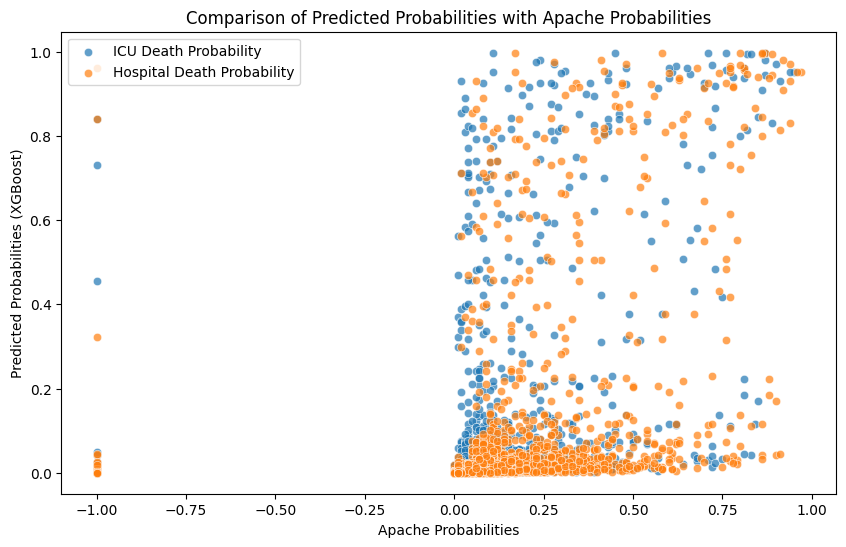

In [40]:
# prompt: compare the y_pred_prob_xgb with  'apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob'

comparison_df = pd.DataFrame({'y_pred_prob_xgb': y_pred_prob_xgb,
                             'apache_4a_icu_death_prob': DM_df['apache_4a_icu_death_prob'][X_test.index],
                             'apache_4a_hospital_death_prob': DM_df['apache_4a_hospital_death_prob'][X_test.index]})

print(comparison_df)

# Calculate correlations
correlations = comparison_df.corr()
print("\nCorrelations:")
print(correlations)

# Visualize the comparison (optional)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='apache_4a_icu_death_prob', y='y_pred_prob_xgb', data=comparison_df, label='ICU Death Probability', alpha=0.7)
sns.scatterplot(x='apache_4a_hospital_death_prob', y='y_pred_prob_xgb', data=comparison_df, label='Hospital Death Probability', alpha=0.7)
plt.xlabel('Apache Probabilities')
plt.ylabel('Predicted Probabilities (XGBoost)')
plt.title('Comparison of Predicted Probabilities with Apache Probabilities')
plt.legend()
plt.show()

In [41]:
# Example usage with Logistic Regression (replace with your desired model)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=40
)

scaler = StandardScaler()
X_train_scaled_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled_resampled = scaler.transform(X_test_resampled)

logreg_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')
logreg_model.fit(X_train_scaled_resampled, y_train_resampled)

y_pred_prob_logreg = logreg_model.predict_proba(X_test_scaled_resampled)[:, 1]
auc_logreg = roc_auc_score(y_test_resampled, y_pred_prob_logreg)
log_loss_logreg = log_loss(y_test_resampled, y_pred_prob_logreg)

print(f"Logistic Regression - ROC-AUC Score (after SMOTE): {auc_logreg}")
print(f"Logistic Regression - Log Loss (after SMOTE): {log_loss_logreg}")

Logistic Regression - ROC-AUC Score (after SMOTE): 0.8720078499098057
Logistic Regression - Log Loss (after SMOTE): 0.4548063992925674


In [42]:
# prompt: Do a PCA reduce the dimention also explained variance should be above 90

from sklearn.decomposition import PCA

# Assuming X is your feature matrix (already preprocessed as in your code)
# and you have X_train_scaled and X_test_scaled from the StandardScaler step

# Initialize PCA with explained variance ratio
pca = PCA(n_components=0.90) # Set the explained variance ratio to 90%

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the fitted PCA object
X_test_pca = pca.transform(X_test_scaled)

# Print the number of principal components selected
print("Number of Principal Components:", pca.n_components_)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_.sum())


# Now you can use X_train_pca and X_test_pca for your model training
# For example, retrain your Logistic Regression model:
logreg_model_pca = LogisticRegression(random_state=42, max_iter=1000, solver='saga')
logreg_model_pca.fit(X_train_pca, y_train)

# Predict probabilities
y_pred_prob_logreg_pca = logreg_model_pca.predict_proba(X_test_pca)[:, 1]

# Evaluate the model
auc_logreg_pca = roc_auc_score(y_test, y_pred_prob_logreg_pca)
log_loss_logreg_pca = log_loss(y_test, y_pred_prob_logreg_pca)

print(f"Logistic Regression (with PCA) - ROC-AUC Score: {auc_logreg_pca}")
print(f"Logistic Regression (with PCA) - Log Loss: {log_loss_logreg_pca}")

Number of Principal Components: 29
Explained Variance Ratio: 0.9042893803001676
Logistic Regression (with PCA) - ROC-AUC Score: 0.8349415204678361
Logistic Regression (with PCA) - Log Loss: 0.20238945932465854


In [43]:
# Predict probabilities using the best performing model (e.g., XGBoost)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Convert probabilities to a DataFrame for better visualization
probability_df = pd.DataFrame({'Probability of Death': y_pred_prob_xgb})

# Display the probabilities
print(probability_df)

# You can also add the actual outcome (y_test) to the DataFrame for comparison:
probability_df['Actual Outcome'] = y_test.values
probability_df

      Probability of Death
0                 0.002059
1                 0.009341
2                 0.024531
3                 0.004158
4                 0.003728
...                    ...
3043              0.000432
3044              0.621699
3045              0.000226
3046              0.007313
3047              0.011408

[3048 rows x 1 columns]


,Probability of Death,Actual Outcome
0,0.002059,0
1,0.009341,0
2,0.024531,0
3,0.004158,0
4,0.003728,0
...,...,...
3043,0.000432,0
3044,0.621699,1
3045,0.000226,0
3046,0.007313,0


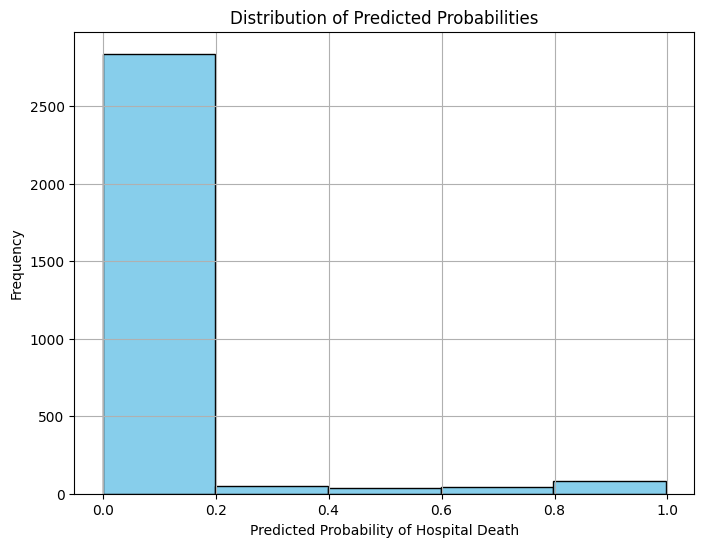

In [44]:
# prompt: plot prob df histogram

# Plot the histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(probability_df['Probability of Death'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability of Hospital Death')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.grid(True)
plt.show()

In [45]:
# prompt: do hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score found: ", grid_search.best_score_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_prob_best_xgb = best_xgb_model.predict_proba(X_test_scaled)[:, 1]
auc_best_xgb = roc_auc_score(y_test, y_pred_prob_best_xgb)
log_loss_best_xgb = log_loss(y_test, y_pred_prob_best_xgb)

print(f"Best XGBoost - ROC-AUC Score: {auc_best_xgb}")
print(f"Best XGBoost - Log Loss: {log_loss_best_xgb}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best ROC-AUC score found:  0.8562342530469744
Best XGBoost - ROC-AUC Score: 0.8686232425034217
Best XGBoost - Log Loss: 0.18915182309441414
